 # EPL Prediction 2018

In [92]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display
import seaborn as sns
from glob import glob

from time import time 

from sklearn.metrics import f1_score


In [93]:
def concat(outfile = 'concat-season0119.csv'): 
    filenames = glob('./dataset/season*.csv') 
    dataframes = []
    for files in filenames:
        dataframes.append(pd.read_csv(files))
    concatDF = pd.concat(dataframes, axis=0)
    concatDF.to_csv('./dataset/'+ outfile, index = None)
    
concat() 
    
data = pd.read_csv('./dataset/concat-season0119.csv')
display(data.head())


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,15/08/09,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,...,5,7,15,14,4,6,2,2,0,0
1,15/08/09,Blackburn,Man City,0,2,A,0,1,A,M Dean,...,9,5,12,9,5,4,2,1,0,0
2,15/08/09,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,...,3,13,16,10,4,7,2,1,0,0
3,15/08/09,Chelsea,Hull,2,1,H,1,1,D,A Wiley,...,12,3,13,15,12,4,1,2,0,0
4,15/08/09,Everton,Arsenal,1,6,A,0,3,A,M Halsey,...,5,9,11,13,4,9,0,0,0,0


In [94]:
read_team_names = pd.read_csv('./dataset/season-1819.csv')
display(read_team_names.head())

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,10/08/18,Man United,Leicester,2,1,H,1,0,H,A Marriner,...,6,4,11,8,2,5,2,1,0,0
1,11/08/18,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,...,4,1,11,9,7,4,1,1,0,0
2,11/08/18,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,...,6,9,9,11,5,5,1,2,0,0
3,11/08/18,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,...,1,4,9,8,2,5,2,1,0,0
4,11/08/18,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,...,2,5,11,12,3,5,2,2,0,0


In [95]:
team_name_list = read_team_names['HomeTeam']
team_name=[]
for teams in team_name_list:
    if teams not in team_name:
        team_name.append(teams)
print("\n\nTeams in Season: 2018-2019")
display(team_name)



Teams in Season: 2018-2019


['Man United',
 'Bournemouth',
 'Fulham',
 'Huddersfield',
 'Newcastle',
 'Watford',
 'Wolves',
 'Arsenal',
 'Liverpool',
 'Southampton',
 'Cardiff',
 'Chelsea',
 'Everton',
 'Leicester',
 'Tottenham',
 'West Ham',
 'Brighton',
 'Burnley',
 'Man City',
 'Crystal Palace']

In [96]:
teams_data_frame = pd.DataFrame(team_name, columns=["Team Names"])
display(teams_data_frame)
teams_data_frame.to_csv('./dataset/Teams.csv', index=None)

,Team Names
0,Man United
1,Bournemouth
2,Fulham
3,Huddersfield
4,Newcastle
5,Watford
6,Wolves
7,Arsenal
8,Liverpool
9,Southampton


In [97]:
#print
print(teams_data_frame[teams_data_frame['Team Names'] == "Man United"])

   Team Names
0  Man United


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3550 non-null   object
 1   HomeTeam  3550 non-null   object
 2   AwayTeam  3550 non-null   object
 3   FTHG      3550 non-null   int64 
 4   FTAG      3550 non-null   int64 
 5   FTR       3550 non-null   object
 6   HTHG      3550 non-null   int64 
 7   HTAG      3550 non-null   int64 
 8   HTR       3550 non-null   object
 9   Referee   3550 non-null   object
 10  HS        3550 non-null   int64 
 11  AS        3550 non-null   int64 
 12  HST       3550 non-null   int64 
 13  AST       3550 non-null   int64 
 14  HF        3550 non-null   int64 
 15  AF        3550 non-null   int64 
 16  HC        3550 non-null   int64 
 17  AC        3550 non-null   int64 
 18  HY        3550 non-null   int64 
 19  AY        3550 non-null   int64 
 20  HR        3550 non-null   int64 
 21  AR        3550

In [99]:
#WIN RATE FOR THE HOME TEAM
n_matches = data.shape[0] #[0] for X-axis
n_features = data.shape[1] - 1  #[1] for Y-axis (total features - Labels to be determined)

n_homewins = len(data[data.FTR == 'H'])
win_rate = (float(n_homewins)/(n_matches))*100

print("Total no of matches: {}".format(n_matches))
print("Number of Features: {}".format(n_features))
print("Number of matches won by HOME: {}".format(n_homewins))
print("Win rate of HOME team: {}".format(win_rate))

Total no of matches: 3550
Number of Features: 21
Number of matches won by HOME: 1632
Win rate of HOME team: 45.97183098591549


In [100]:
def getTeamData(teamName):
    print("\n======================= "+ teamName + " =====================\n")
    
    #Num of goals in wins and looses
    gamesHome = data[data['HomeTeam']== teamName]
    totalGoalsScored = gamesHome['FTHG'].sum()
    
    gamesAway = data[data['AwayTeam'] == teamName]
    totalGames = gamesHome.append(gamesAway)
    numGames = len(totalGames.index)
    totalGoalsScored += gamesAway['FTAG'].sum() 
    
    
    #total goals allowed 
    totalGoalsAllowed = gamesHome['FTHG'].sum()
    totalGoalsAllowed += gamesAway['FTAG'].sum()
    
    #discipline TOTAL RED AND YELLOW CARDS
    totalYellowCards = gamesHome['HY'].sum()
    totalYellowCards += gamesAway['AY'].sum()
    
    totalRedCards = gamesHome['HR'].sum()
    totalRedCards += gamesAway['AR'].sum()
    
    
    #total Fouls
    totalFouls = gamesHome['HF'].sum()
    totalFouls += gamesAway['AF'].sum()
    
    
    #total Corners
    totalCorners = gamesHome['HC'].sum()
    totalCorners += gamesAway['AC'].sum()
    
    
    #shots per game (SPG) = totalshots / totalgames
    totalShots = gamesHome['HS'].sum()
    totalShots += gamesAway['AS'].sum()
    
    #avg shots allowed per game
    totalShotsAgainst = gamesHome['AS'].sum()
    totalShotsAgainst += gamesAway['HS'].sum()
    if numGames != 0:
        HSPG = totalShots / numGames #HomeShotsPerGame
        ASPG = totalShotsAgainst / numGames #AwayShotsPerGame
        display("HSPG: {}".format(HSPG))
        display("ASPG: {}".format(ASPG))
    
    #games won percentage= GamesWon / numGames
    gamesWon = totalGames[totalGames['FTR']== "H"]
    gamesLost = totalGames[totalGames['FTR'] == "A"]
    gamesDraw = totalGames[totalGames['FTR'] == "D"]
    numGamesWon = len(gamesWon.index)
    numGamesLost = len(gamesLost.index)
    numGamesDraw = len(gamesDraw.index)
    
    if numGames != 0:
        gamesWonPercent = numGamesWon / numGames
        gamesLostPercent = numGamesLost / numGames
        gamesDrawPercent = numGamesDraw / numGames 
    
    print("Games Win Percent: {}".format(gamesWonPercent))
    print("Games Loose Percent: {}".format(gamesLostPercent))
    print("Games Draw Percent: {}".format(gamesDrawPercent))
    
    
    #Total shots on target:
    totalShotsOnTarget = gamesHome['HST'].sum()
    totalShotsOnTarget += gamesAway['AST'].sum()
    
    #GoalSaves
    goalSaves = totalShotsOnTarget - totalGoalsAllowed
    
    #Goal Save Percentage
    if totalShotsOnTarget != 0:
        goalSavesPercent = goalSaves / totalShotsOnTarget
        
    #Goal Save Ratio
    if goalSaves != 0:
        saveRatio = totalShotsOnTarget / goalSaves
    
    #Goal scoring Percent
    if totalShots != 0 :
        scoringPercent = (totalShots - totalGoalsScored)/totalShots
    
    #Goal scoring Ration
    if totalGoalsScored != 0:
        scoringRatio = totalShotsOnTarget / totalGoalsScored
        
    if numGames == 0: 
        gamesWon = 0
        gamesLost = 0
        gamesDraw = 0 
        totalGoalsScored = 0 
        totalShotsOnTarget = 0 
        totalGoalsAllowed = 0 
        totalYellowCards = 0 
        totalRedCards = 0 
        totalFouls = 0 
        totalCorners = 0 
        totalShots = 0 
        totalShotsAgainst = 0 
        HSPG = 0 #HomeShotsPerGame 
        ASPG = 0 #AwayShotsPerGame 
        goalSaves = 0 
        goalSavesPercent = 0 
        scoringPercent = 0 
        saveRatio = 0 
        scoringRatio = 0
    
    return [teamName, totalGoalsScored, totalShotsOnTarget, totalGoalsAllowed, 
            totalYellowCards, totalRedCards,totalFouls, totalCorners, 
            totalShots, totalShotsAgainst, HSPG, ASPG, goalSaves, goalSavesPercent, scoringPercent,
            saveRatio, scoringRatio]


In [101]:
getTeamData('Man United')


======================= Man United =====================



'HSPG: 14.07887323943662'

'ASPG: 10.904225352112675'

Games Win Percent: 0.4788732394366197
Games Loose Percent: 0.30985915492957744
Games Draw Percent: 0.2112676056338028


['Man United',
 656,
 2293,
 656,
 577,
 23,
 3931,
 2206,
 4998,
 3871,
 14.07887323943662,
 10.904225352112675,
 1637,
 0.7139119058002616,
 0.8687474989995998,
 1.4007330482590103,
 3.495426829268293]

In [102]:
newStatList = []
for team in team_name:
    team_vector = getTeamData(team) 
    newStatList.append(team_vector)
    
teamStats = pd.DataFrame(newStatList, columns=['TeamName', 'totalGoalsScored', 'totalShotsOnTarget', 'totalGoalsAllowed', 
            'totalYellowCards', 'totalRedCards','totalFouls', 'totalCorners', 
            'totalShots', 'totalShotsAgainst', 'HSPG', 'ASPG', 'goalSaves', 'goalSavesPercent', 'scoringPercent',
            'saveRatio', 'scoringRatio'])


======================= Man United =====================



'HSPG: 14.07887323943662'

'ASPG: 10.904225352112675'

Games Win Percent: 0.4788732394366197
Games Loose Percent: 0.30985915492957744
Games Draw Percent: 0.2112676056338028

======================= Bournemouth =====================



'HSPG: 12.118110236220472'

'ASPG: 13.511811023622048'

Games Win Percent: 0.4330708661417323
Games Loose Percent: 0.31496062992125984
Games Draw Percent: 0.25196850393700787

======================= Fulham =====================



'HSPG: 11.51231527093596'

'ASPG: 14.305418719211822'

Games Win Percent: 0.4827586206896552
Games Loose Percent: 0.2561576354679803
Games Draw Percent: 0.26108374384236455

======================= Huddersfield =====================



'HSPG: 9.843137254901961'

'ASPG: 11.882352941176471'

Games Win Percent: 0.4117647058823529
Games Loose Percent: 0.3137254901960784
Games Draw Percent: 0.27450980392156865

======================= Newcastle =====================



'HSPG: 12.157706093189963'

'ASPG: 12.637992831541219'

Games Win Percent: 0.4838709677419355
Games Loose Percent: 0.2903225806451613
Games Draw Percent: 0.22580645161290322

======================= Watford =====================



'HSPG: 11.48031496062992'

'ASPG: 12.472440944881889'

Games Win Percent: 0.49606299212598426
Games Loose Percent: 0.2992125984251969
Games Draw Percent: 0.2047244094488189

======================= Wolves =====================



'HSPG: 10.582677165354331'

'ASPG: 13.803149606299213'

Games Win Percent: 0.41732283464566927
Games Loose Percent: 0.33070866141732286
Games Draw Percent: 0.25196850393700787

======================= Arsenal =====================



'HSPG: 14.971830985915492'

'ASPG: 10.433802816901409'

Games Win Percent: 0.49295774647887325
Games Loose Percent: 0.29295774647887324
Games Draw Percent: 0.2140845070422535

======================= Liverpool =====================



'HSPG: 15.80281690140845'

'ASPG: 9.794366197183098'

Games Win Percent: 0.4647887323943662
Games Loose Percent: 0.28169014084507044
Games Draw Percent: 0.2535211267605634

======================= Southampton =====================



'HSPG: 13.356846473029046'

'ASPG: 11.269709543568466'

Games Win Percent: 0.4149377593360996
Games Loose Percent: 0.2946058091286307
Games Draw Percent: 0.29045643153526973

======================= Cardiff =====================



'HSPG: 11.098039215686274'

'ASPG: 16.92156862745098'

Games Win Percent: 0.49019607843137253
Games Loose Percent: 0.29411764705882354
Games Draw Percent: 0.21568627450980393

======================= Chelsea =====================



'HSPG: 16.098591549295776'

'ASPG: 10.36338028169014'

Games Win Percent: 0.4788732394366197
Games Loose Percent: 0.30704225352112674
Games Draw Percent: 0.2140845070422535

======================= Everton =====================



'HSPG: 13.014084507042254'

'ASPG: 12.261971830985916'

Games Win Percent: 0.4591549295774648
Games Loose Percent: 0.22535211267605634
Games Draw Percent: 0.3154929577464789

======================= Leicester =====================



'HSPG: 12.103030303030303'

'ASPG: 13.666666666666666'

Games Win Percent: 0.4666666666666667
Games Loose Percent: 0.2787878787878788
Games Draw Percent: 0.2545454545454545

======================= Tottenham =====================



'HSPG: 15.88169014084507'

'ASPG: 10.988732394366197'

Games Win Percent: 0.4535211267605634
Games Loose Percent: 0.3183098591549296
Games Draw Percent: 0.22816901408450704

======================= West Ham =====================



'HSPG: 12.1198738170347'

'ASPG: 14.794952681388013'

Games Win Percent: 0.45110410094637227
Games Loose Percent: 0.26813880126182965
Games Draw Percent: 0.2807570977917981

======================= Brighton =====================



'HSPG: 9.509803921568627'

'ASPG: 15.372549019607844'

Games Win Percent: 0.5294117647058824
Games Loose Percent: 0.1568627450980392
Games Draw Percent: 0.3137254901960784

======================= Burnley =====================



'HSPG: 10.393939393939394'

'ASPG: 16.048484848484847'

Games Win Percent: 0.48484848484848486
Games Loose Percent: 0.2727272727272727
Games Draw Percent: 0.24242424242424243

======================= Man City =====================



'HSPG: 16.064788732394366'

'ASPG: 9.236619718309859'

Games Win Percent: 0.49295774647887325
Games Loose Percent: 0.30704225352112674
Games Draw Percent: 0.2

======================= Crystal Palace =====================



'HSPG: 11.704433497536947'

'ASPG: 13.625615763546797'

Games Win Percent: 0.39901477832512317
Games Loose Percent: 0.3891625615763547
Games Draw Percent: 0.21182266009852216


In [103]:
display(teamStats)

,TeamName,totalGoalsScored,totalShotsOnTarget,totalGoalsAllowed,totalYellowCards,totalRedCards,totalFouls,totalCorners,totalShots,totalShotsAgainst,HSPG,ASPG,goalSaves,goalSavesPercent,scoringPercent,saveRatio,scoringRatio
0,Man United,656,2293,656,577,23,3931,2206,4998,3871,14.078873,10.904225,1637,0.713912,0.868747,1.400733,3.495427
1,Bournemouth,167,521,167,179,6,1184,709,1539,1716,12.118110,13.511811,354,0.679463,0.891488,1.471751,3.119760
2,Fulham,240,1204,240,279,7,2122,981,2337,2904,11.512315,14.305419,964,0.800664,0.897304,1.248963,5.016667
3,Huddersfield,36,154,36,80,4,536,219,502,606,9.843137,11.882353,118,0.766234,0.928287,1.305085,4.277778
4,Newcastle,334,1431,334,457,29,3088,1385,3392,3526,12.157706,12.637993,1097,0.766597,0.901533,1.304467,4.284431
5,Watford,141,465,141,247,13,1574,588,1458,1584,11.480315,12.472441,324,0.696774,0.903292,1.435185,3.297872
6,Wolves,130,703,130,211,10,1424,726,1344,1753,10.582677,13.803150,573,0.815078,0.903274,1.226876,5.407692
7,Arsenal,684,2495,684,540,31,3592,2248,5315,3704,14.971831,10.433803,1811,0.725852,0.871308,1.377692,3.647661
8,Liverpool,642,2471,642,520,23,3709,2311,5610,3477,15.802817,9.794366,1829,0.740186,0.885561,1.351011,3.848910
9,Southampton,304,1156,304,365,16,2695,1349,3219,2716,13.356846,11.269710,852,0.737024,0.905561,1.356808,3.802632


C:\Users\shashi\anaconda3\envs\tfnew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


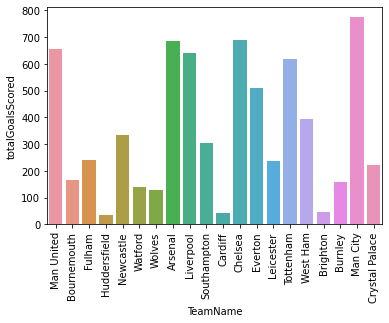

In [104]:
totalGoalsScoredPlot = sns.barplot(teamStats.TeamName, teamStats.totalGoalsScored) 
for item in totalGoalsScoredPlot.get_xticklabels():
    item.set_rotation(90)

C:\Users\shashi\anaconda3\envs\tfnew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


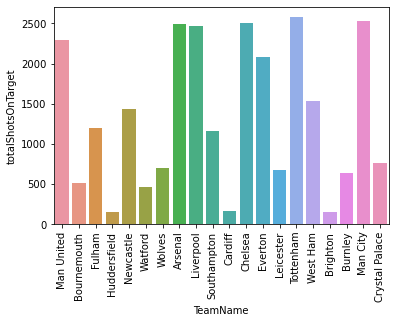

In [105]:
totalShotsOnTargetPlot = sns.barplot(teamStats.TeamName, teamStats.totalShotsOnTarget)
for item in totalShotsOnTargetPlot.get_xticklabels():
    item.set_rotation(90)

C:\Users\shashi\anaconda3\envs\tfnew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


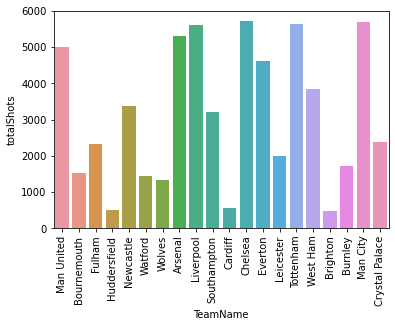

In [106]:
totalShotsPlot = sns.barplot(teamStats.TeamName, teamStats.totalShots) 
for item in totalShotsPlot.get_xticklabels():
    item.set_rotation(90)

C:\Users\shashi\anaconda3\envs\tfnew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


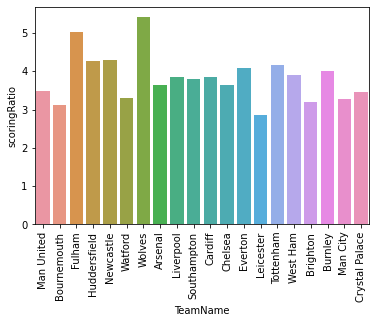

In [107]:
scoringRatioPlot = sns.barplot(teamStats.TeamName, teamStats.scoringRatio) 
for item in scoringRatioPlot.get_xticklabels():
    item.set_rotation(90)

array([[<AxesSubplot:xlabel='FTHG', ylabel='FTHG'>,
        <AxesSubplot:xlabel='FTAG', ylabel='FTHG'>,
        <AxesSubplot:xlabel='HTHG', ylabel='FTHG'>,
        <AxesSubplot:xlabel='HTAG', ylabel='FTHG'>,
        <AxesSubplot:xlabel='HS', ylabel='FTHG'>,
        <AxesSubplot:xlabel='AS', ylabel='FTHG'>,
        <AxesSubplot:xlabel='HST', ylabel='FTHG'>,
        <AxesSubplot:xlabel='AST', ylabel='FTHG'>,
        <AxesSubplot:xlabel='HC', ylabel='FTHG'>,
        <AxesSubplot:xlabel='AC', ylabel='FTHG'>],
       [<AxesSubplot:xlabel='FTHG', ylabel='FTAG'>,
        <AxesSubplot:xlabel='FTAG', ylabel='FTAG'>,
        <AxesSubplot:xlabel='HTHG', ylabel='FTAG'>,
        <AxesSubplot:xlabel='HTAG', ylabel='FTAG'>,
        <AxesSubplot:xlabel='HS', ylabel='FTAG'>,
        <AxesSubplot:xlabel='AS', ylabel='FTAG'>,
        <AxesSubplot:xlabel='HST', ylabel='FTAG'>,
        <AxesSubplot:xlabel='AST', ylabel='FTAG'>,
        <AxesSubplot:xlabel='HC', ylabel='FTAG'>,
        <AxesSubplot:xlabel='

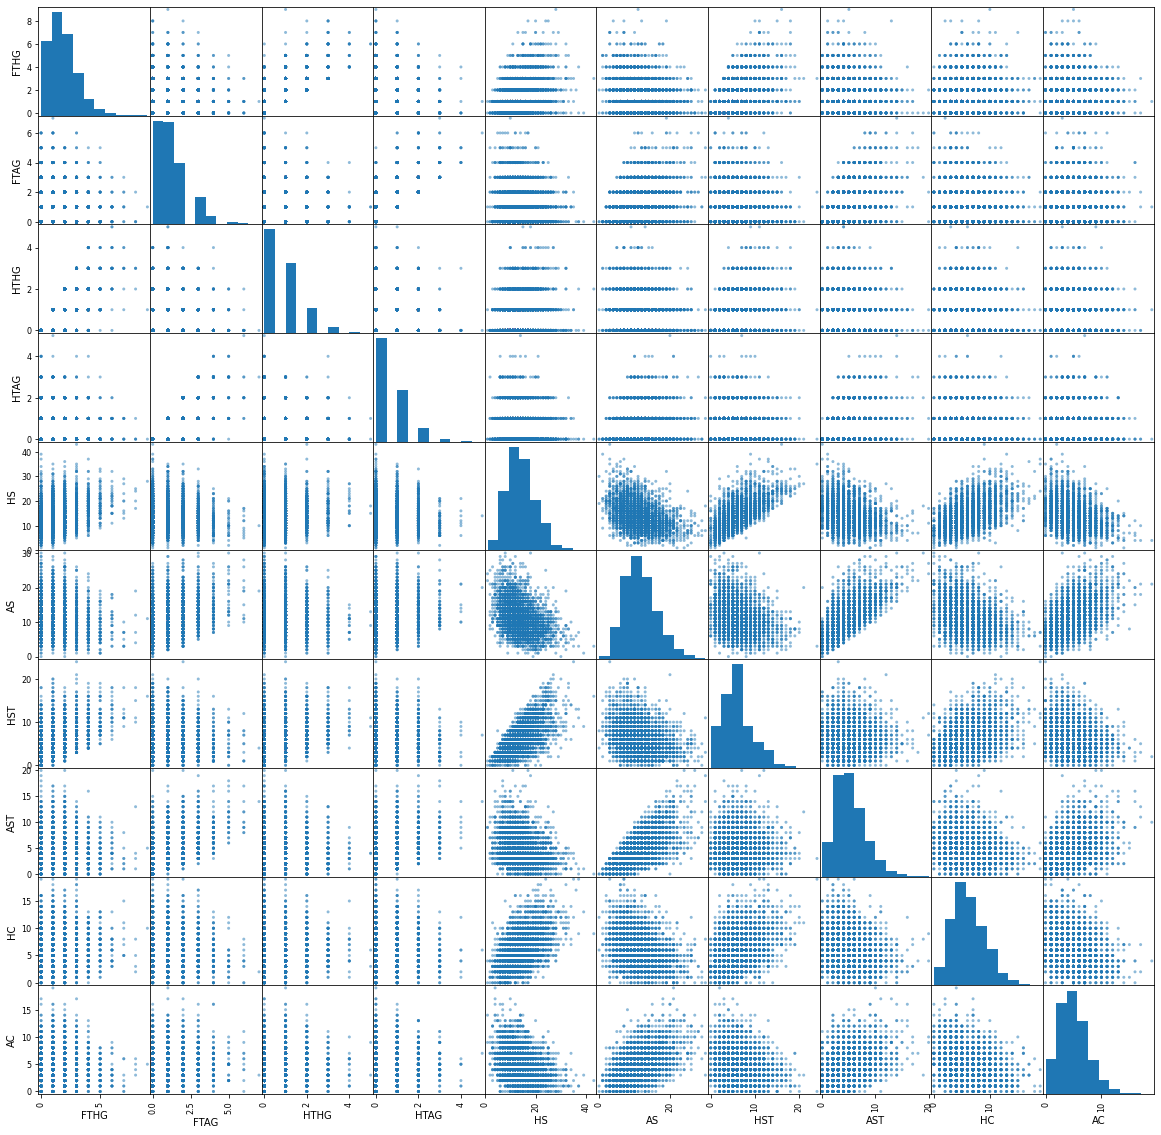

In [108]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HC','AC']],figsize=(20,20))

In [109]:
filteredData = data[(data.HomeTeam.isin(team_name))]
data = filteredData[(filteredData.AwayTeam.isin(team_name))]

In [110]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = data.drop(['FTR'],1)
y_all = data['FTR']
# Z_all = X_all.drop(['Date','FTHG','FTAG','HTHG','HTAG','HTR','Referee'],1)
Z_all = X_all.drop(['Date','HTR','Referee'],1)

# print(X_all)
# print(y_all)
# print(Z_all)

# Standardising the data.
from sklearn.preprocessing import scale
#Center to the mean and component wise scale to unit variance.
# cols = [['HS','AS','HST','HF','AF','HY','AY','HR','AR','HC','AC','AST','HC','AC']]
cols = [['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','HF','AF','HY','AY','HR','AR','HC','AC','AST','HC','AC']]
for col in cols:
    X_all[col] = scale(X_all[col])

In [111]:
Z_all.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
3545,Watford,Liverpool,0,3,0,0,5,10,1,7,12,13,5,5,0,0,0,1
3546,West Ham,Man City,0,4,0,3,9,9,1,6,6,3,8,1,0,0,0,0
3547,Bournemouth,Arsenal,1,2,1,1,11,20,5,4,6,9,5,8,2,1,0,0
3548,Wolves,Huddersfield,0,2,0,1,12,14,3,6,9,8,3,5,1,2,0,0
3549,Burnley,Newcastle,1,2,1,2,14,17,4,3,6,11,5,5,0,1,0,0


In [112]:
def preprocess_features(Z):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    output = pd.DataFrame(index = Z.index)

    for col, col_data in Z.iteritems():
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        output = output.join(col_data)
    
    return output

In [113]:
Z_all = preprocess_features(Z_all)
print ("Processed feature columns ({} total features):\n{}".format(len(Z_all.columns), list(Z_all.columns)))

Processed feature columns (56 total features):
['HomeTeam_Arsenal', 'HomeTeam_Bournemouth', 'HomeTeam_Brighton', 'HomeTeam_Burnley', 'HomeTeam_Cardiff', 'HomeTeam_Chelsea', 'HomeTeam_Crystal Palace', 'HomeTeam_Everton', 'HomeTeam_Fulham', 'HomeTeam_Huddersfield', 'HomeTeam_Leicester', 'HomeTeam_Liverpool', 'HomeTeam_Man City', 'HomeTeam_Man United', 'HomeTeam_Newcastle', 'HomeTeam_Southampton', 'HomeTeam_Tottenham', 'HomeTeam_Watford', 'HomeTeam_West Ham', 'HomeTeam_Wolves', 'AwayTeam_Arsenal', 'AwayTeam_Bournemouth', 'AwayTeam_Brighton', 'AwayTeam_Burnley', 'AwayTeam_Cardiff', 'AwayTeam_Chelsea', 'AwayTeam_Crystal Palace', 'AwayTeam_Everton', 'AwayTeam_Fulham', 'AwayTeam_Huddersfield', 'AwayTeam_Leicester', 'AwayTeam_Liverpool', 'AwayTeam_Man City', 'AwayTeam_Man United', 'AwayTeam_Newcastle', 'AwayTeam_Southampton', 'AwayTeam_Tottenham', 'AwayTeam_Watford', 'AwayTeam_West Ham', 'AwayTeam_Wolves', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 

In [114]:
print ("\nFeature values:")
display(Z_all.head())


Feature values:


,HomeTeam_Arsenal,HomeTeam_Bournemouth,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Cardiff,HomeTeam_Chelsea,HomeTeam_Crystal Palace,HomeTeam_Everton,HomeTeam_Fulham,HomeTeam_Huddersfield,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
4,0,0,0,0,0,0,0,1,0,0,...,5,9,11,13,4,9,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,11,13,9,5,8,6,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,11,3,14,16,6,5,3,3,0,0
13,0,0,0,1,0,0,0,0,0,0,...,2,9,8,12,1,12,2,1,0,0
19,0,0,0,0,0,0,0,0,0,0,...,11,2,7,11,5,6,0,1,0,0


In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Z_all, y_all, 
                                                    test_size = 50,
                                                    random_state = 2,
                                                    stratify = y_all)

In [116]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, average='macro'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    train_classifier(clf, X_train, y_train)
    
    f1, acc = predict_labels(clf, X_train, y_train)
    print (f1, acc)
    print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

In [117]:
# Initialize the  models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 912, kernel='rbf')


train_predict(clf_A, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_B, X_train, y_train, X_test, y_test)



Training a LogisticRegression using a training set size of 1448. . .
Trained model in 0.1780 seconds
Made predictions in 0.0020 seconds.
1.0 1.0
F1 score and accuracy score for training set: 1.0000 , 1.0000.


C:\Users\shashi\anaconda3\envs\tfnew\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Made predictions in 0.0040 seconds.
F1 score and accuracy score for test set: 1.0000 , 1.0000.

Training a SVC using a training set size of 1448. . .
Trained model in 0.1536 seconds
Made predictions in 0.2632 seconds.
0.7804606344671708 0.8142265193370166
F1 score and accuracy score for training set: 0.7805 , 0.8142.
Made predictions in 0.0110 seconds.
F1 score and accuracy score for test set: 0.7970 , 0.8200.


In [118]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\shashi\anaconda3\envs\tfnew\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [119]:
model.predict(X_test)

array(['H', 'H', 'A', 'A', 'D', 'H', 'D', 'A', 'A', 'H', 'D', 'H', 'D',
       'D', 'D', 'H', 'H', 'A', 'H', 'A', 'H', 'H', 'H', 'A', 'H', 'A',
       'D', 'A', 'D', 'H', 'D', 'H', 'A', 'H', 'A', 'H', 'H', 'H', 'H',
       'A', 'H', 'A', 'D', 'A', 'H', 'H', 'D', 'D', 'A', 'H'],
      dtype=object)

In [120]:
predictedProbability = model.predict_proba(X_test)
predictedProbability = pd.DataFrame(predictedProbability, columns=['Away Team','Draw','Home Team'])

display((predictedProbability *100).head(10))

,Away Team,Draw,Home Team
0,2.614208e-04,2.511723,9.748802e+01
1,3.693312e-14,0.000028,9.999997e+01
2,9.635141e+01,3.648207,3.869472e-04
3,9.570188e+01,4.297324,7.941665e-04
4,5.891746e+00,89.647710,4.460544e+00
5,1.945125e-14,0.000016,9.999998e+01
6,3.534865e+00,93.900977,2.564158e+00
7,9.999996e+01,0.000040,1.778939e-14
8,9.999103e+01,0.008968,2.101769e-09
9,4.288680e-09,0.017036,9.998296e+01


In [121]:
fixtures = pd.read_csv('./dataset/Fixtures/fixtures.csv')
# fixtures = fixtures[pd.isnull(fixtures['Result'])] #drop all the rows having result certain values
fixtures = fixtures.drop(['Round Number','Date','Location','Result'],1)
fixtures.columns = ['HomeTeam','AwayTeam']
fixtures['FTHG']= 0
fixtures['FTAG'] =0 
fixtures['HTHG'] = 0
fixtures['HTAG'] = 0
fixtures['HS'] = 0
fixtures['AS'] = 0
fixtures['HST'] = 0
fixtures['AST'] = 0
fixtures['HF'] = 0
fixtures['AF'] = 0
fixtures['HC'] = 0
fixtures['AC'] = 0
fixtures['HY'] = 0
fixtures['AY'] = 0
fixtures['HR'] = 0
fixtures['AR'] = 0

In [122]:
display(fixtures.head(10))

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Man Utd,Leicester,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Newcastle,Spurs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bournemouth,Cardiff,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fulham,Crystal Palace,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Huddersfield,Chelsea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Watford,Brighton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Wolves,Everton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Liverpool,West Ham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Southampton,Burnley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Arsenal,Man City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
preprocessedFixtures = preprocess_features(fixtures)

In [124]:
print ("Processed feature columns ({} total features):\n{}".format(len(preprocessedFixtures.columns),
                                                                   list(preprocessedFixtures.columns)))

Processed feature columns (56 total features):
['HomeTeam_Arsenal', 'HomeTeam_Bournemouth', 'HomeTeam_Brighton', 'HomeTeam_Burnley', 'HomeTeam_Cardiff', 'HomeTeam_Chelsea', 'HomeTeam_Crystal Palace', 'HomeTeam_Everton', 'HomeTeam_Fulham', 'HomeTeam_Huddersfield', 'HomeTeam_Leicester', 'HomeTeam_Liverpool', 'HomeTeam_Man City', 'HomeTeam_Man Utd', 'HomeTeam_Newcastle', 'HomeTeam_Southampton', 'HomeTeam_Spurs', 'HomeTeam_Watford', 'HomeTeam_West Ham', 'HomeTeam_Wolves', 'AwayTeam_Arsenal', 'AwayTeam_Bournemouth', 'AwayTeam_Brighton', 'AwayTeam_Burnley', 'AwayTeam_Cardiff', 'AwayTeam_Chelsea', 'AwayTeam_Crystal Palace', 'AwayTeam_Everton', 'AwayTeam_Fulham', 'AwayTeam_Huddersfield', 'AwayTeam_Leicester', 'AwayTeam_Liverpool', 'AwayTeam_Man City', 'AwayTeam_Man Utd', 'AwayTeam_Newcastle', 'AwayTeam_Southampton', 'AwayTeam_Spurs', 'AwayTeam_Watford', 'AwayTeam_West Ham', 'AwayTeam_Wolves', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'A

In [125]:
model.predict(preprocessedFixtures)

array(['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D

In [126]:
fixtures['Result Predicted'] = model.predict(preprocessedFixtures)

In [127]:
Result = fixtures.drop(['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','HF','AF','HY',
                        'AY','HR','AR','HC','AC','AST','HC','AC'],1)
Result.head(10)

,HomeTeam,AwayTeam,Result Predicted
0,Man Utd,Leicester,D
1,Newcastle,Spurs,D
2,Bournemouth,Cardiff,D
3,Fulham,Crystal Palace,D
4,Huddersfield,Chelsea,D
5,Watford,Brighton,D
6,Wolves,Everton,D
7,Liverpool,West Ham,D
8,Southampton,Burnley,D
9,Arsenal,Man City,D


In [128]:
fixturePredictedProbability = model.predict_proba(preprocessedFixtures) *100
fixturePredictedProbability = pd.DataFrame(fixturePredictedProbability, columns=['Away win %','Draw %','Home win %'])

display(fixturePredictedProbability)

,Away win %,Draw %,Home win %
0,20.544781,44.063194,35.392025
1,27.292563,53.282508,19.424929
2,21.879648,54.731098,23.389255
3,29.544975,43.819120,26.635904
4,24.008477,57.258686,18.732837
...,...,...,...
375,20.131134,63.816238,16.052628
376,21.290100,42.477779,36.232121
377,20.506591,63.023402,16.470007
378,22.625617,49.857050,27.517333


In [129]:
final = pd.concat([Result, fixturePredictedProbability], axis = 1)

In [130]:
final.head(20)

,HomeTeam,AwayTeam,Result Predicted,Away win %,Draw %,Home win %
0,Man Utd,Leicester,D,20.544781,44.063194,35.392025
1,Newcastle,Spurs,D,27.292563,53.282508,19.424929
2,Bournemouth,Cardiff,D,21.879648,54.731098,23.389255
3,Fulham,Crystal Palace,D,29.544975,43.819120,26.635904
4,Huddersfield,Chelsea,D,24.008477,57.258686,18.732837
5,Watford,Brighton,D,19.380134,57.200677,23.419189
6,Wolves,Everton,D,17.611727,62.394092,19.994181
7,Liverpool,West Ham,D,18.410153,62.846375,18.743472
8,Southampton,Burnley,D,22.270218,58.405179,19.324603
9,Arsenal,Man City,D,17.593540,58.934510,23.471950


In [131]:
final.to_csv('./dataset/Final-Results/final-Predicted-Result.csv', index = None) 

In [132]:
readFixtures = pd.read_csv('./dataset/Fixtures/fixtures.csv')
exportToFixtures = final.drop(['HomeTeam','AwayTeam'],1)

PredictedResultWithFixtureData = pd.concat([readFixtures,exportToFixtures], axis = 1)
PredictedResultWithFixtureData.to_csv('./dataset/Final-Results/Predicted_Result_With_Fixture_Data.csv')


display(PredictedResultWithFixtureData.head(20))


,Round Number,Date,Location,Home Team,Away Team,Result,Result Predicted,Away win %,Draw %,Home win %
0,1,11/08/2018 00:45,Old Trafford,Man Utd,Leicester,2 - 1,D,20.544781,44.063194,35.392025
1,1,11/08/2018 17:15,St. James' Park,Newcastle,Spurs,1 - 2,D,27.292563,53.282508,19.424929
2,1,11/08/2018 19:45,Vitality Stadium,Bournemouth,Cardiff,2 - 0,D,21.879648,54.731098,23.389255
3,1,11/08/2018 19:45,Craven Cottage,Fulham,Crystal Palace,0 - 2,D,29.544975,43.819120,26.635904
4,1,11/08/2018 19:45,John Smith's Stadium,Huddersfield,Chelsea,0 - 3,D,24.008477,57.258686,18.732837
5,1,11/08/2018 19:45,Vicarage Road,Watford,Brighton,2 - 0,D,19.380134,57.200677,23.419189
6,1,11/08/2018 22:15,Molineux Stadium,Wolves,Everton,2 - 2,D,17.611727,62.394092,19.994181
7,1,12/08/2018 18:15,Anfield,Liverpool,West Ham,4 - 0,D,18.410153,62.846375,18.743472
8,1,12/08/2018 18:15,St. Mary's Stadium,Southampton,Burnley,0 - 0,D,22.270218,58.405179,19.324603
9,1,12/08/2018 20:45,Emirates Stadium,Arsenal,Man City,0 - 2,D,17.593540,58.934510,23.471950
